In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.24_45.00_50.00_LVMYO_HEX8_83648_wr.xplt")
lv = LV.from_file(filepath)
lv.identify_regions(LV_GEO_TYPES.TYPE_A,
    endo_epi_args={"threshold":85,})

In [3]:
import json
with open("../sample_files/spk_json.json", "r") as spk_file:
  spk_json = json.load(spk_file)
for spk_data in spk_json:
  if spk_data["from_nodeset"] == "endo":
    spk_data["from_nodeset"] = LV_SURFS.ENDO.value
  elif spk_data["from_nodeset"] == "epi":
    spk_data["from_nodeset"] = LV_SURFS.EPI.value
  else:
    print(spk_data)

for spk_data in spk_json:
  lv.create_speckles(**spk_data)

In [4]:
# lv.plot("surface", 
#         scalars=LV_MESH_DATA.SURFS,
#         # container="cells",
#         show_edges=True,
#         categorical=True,
#         split_sharp_edges=True,
#         smooth_shading=False,
#         pretty=False,
#         )

Volume:

In [5]:
lv.volume()

array([95993.98140237, 77619.19861646, 63257.7453644 , 53339.77682199,
       46834.19796486, 46450.63398739, 46676.83046096, 46729.32112039,
       46795.73413616, 46934.14508683, 47116.98245368, 47298.89414408,
       47538.56738255, 47805.70476376, 48134.55980313, 48420.45798249,
       48729.50199268, 49061.81135896, 49400.84255932, 49747.92877439,
       50101.6734778 , 50454.94842903, 50811.37975838, 51169.11316778,
       51526.34864955, 51883.41325396, 52238.83464323, 52590.31081084,
       52936.75721954, 53277.40193504, 53612.00089657, 53940.03285051,
       54261.43492141, 54576.22483071, 54884.06066516, 55184.43146293,
       55476.93940501, 55761.96521925, 56039.82847599, 56310.60282253,
       56574.19954225, 56831.12134436, 57081.75939757, 57326.21407796,
       57564.58437723])

Ejection Fraction:

In [6]:
lv.ejection_fraction()

array([ 0.        , 19.14159879, 34.10238388, 44.43424885, 51.21131838,
       51.61088924, 51.37525314, 51.32057194, 51.25138738, 51.10720026,
       50.91673273, 50.72722951, 50.47755423, 50.19926868, 49.85668987,
       49.55886059, 49.23691956, 48.89074227, 48.53756263, 48.17599182,
       47.80748465, 47.43946684, 47.06816092, 46.69549859, 46.32335497,
       45.95138935, 45.58113553, 45.21499156, 44.85408726, 44.49922677,
       44.15066433, 43.80894295, 43.47412814, 43.14620142, 42.82551899,
       42.51261313, 42.20789825, 41.91097775, 41.62151871, 41.33944441,
       41.06484728, 40.79720362, 40.53610595, 40.28144969, 40.03313173])

Longitudinal shortening:

In [7]:
lv.longitudinal_shortening()

array([ 0.        ,  0.46901488, -0.06550491, -0.94165826, -1.5020456 ,
       -1.7143162 , -1.74463706, -1.80390488, -1.80052704, -1.78349104,
       -1.80201795, -1.85131445, -1.89387787, -1.93142238, -1.83428463,
       -1.81711042, -1.84227584, -1.90939522, -1.96673013, -2.02746759,
       -2.0889959 , -2.15408367, -2.2210371 , -2.28878796, -2.35353796,
       -2.42863425, -2.50465552, -2.57969094, -2.65586353, -2.73141285,
       -2.80575479, -2.87618382, -2.94757563, -3.01791599, -3.07978472,
       -3.1497959 , -3.21896173, -3.28302104, -3.34542221, -3.41183671,
       -3.46463906, -3.52224668, -3.580666  , -3.63534018, -3.68859192])

Radial shortening

In [8]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radial_shortening(circ_spks, t_ed=0.1)

array([-29.78308333, -20.3935104 , -11.56646507,  -4.63517564,
         0.        ,  -0.21350426,  -0.30939529,  -0.5043765 ,
        -0.72168004,  -0.94631928,  -1.11895456,  -1.3027141 ,
        -1.51840457,  -1.71574336,  -1.95813824,  -2.20651249,
        -2.42438141,  -2.64106399,  -2.9329321 ,  -3.15109642,
        -3.36941791,  -3.59134051,  -3.81790067,  -4.03216593,
        -4.24647015,  -4.44752907,  -4.65229903,  -4.85140077,
        -5.04888759,  -5.247183  ,  -5.42694426,  -5.60405865,
        -5.77499174,  -5.94064463,  -6.10233306,  -6.25856544,
        -6.41181655,  -6.55704309,  -6.69964826,  -6.78681939,
        -6.91600988,  -7.06073774,  -7.18898109,  -7.31114181,
        -7.42957415])

Wall thickening:

In [9]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1)

array([-2.39789809e+01, -1.48354399e+01, -7.69570456e+00, -2.95568338e+00,
        0.00000000e+00,  4.85452614e-02, -3.49843266e-01, -1.79813942e-01,
        1.30985930e-02, -4.08790230e-02, -1.40589896e-01, -2.46663642e-01,
       -4.23152529e-01, -5.75695094e-01, -7.56529437e-01, -9.79297798e-01,
       -1.19045083e+00, -1.41937731e+00, -1.79064039e+00, -2.02635399e+00,
       -2.27095923e+00, -2.53352438e+00, -2.80593862e+00, -3.06839180e+00,
       -3.34139836e+00, -3.59281470e+00, -3.86433033e+00, -4.13421030e+00,
       -4.37357557e+00, -4.65095591e+00, -4.91763669e+00, -5.17516783e+00,
       -5.42687366e+00, -5.67506855e+00, -5.92050086e+00, -6.15856219e+00,
       -6.39656776e+00, -6.62337713e+00, -6.84898539e+00, -6.97028438e+00,
       -7.16421985e+00, -7.29184637e+00, -7.50627474e+00, -7.70565141e+00,
       -7.90035968e+00])

Longitudinal strain:

In [10]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1)

array([ 1.57007438,  1.24447559,  0.83594175,  0.40195562,  0.        ,
       -0.27034695, -0.40696878, -0.33813844, -0.26995788, -0.25915086,
       -0.26092597, -0.27948021, -0.30417403, -0.32860563, -0.35724119,
       -0.38999858, -0.4322372 , -0.48821685, -0.55917377, -0.63440264,
       -0.71115593, -0.79053363, -0.87224093, -0.95619522, -1.04195158,
       -1.12965384, -1.21884246, -1.30779895, -1.3960528 , -1.48432274,
       -1.57141777, -1.65774894, -1.74223163, -1.82552835, -1.90728956,
       -1.98783167, -2.06673695, -2.14456138, -2.22244901, -2.29884268,
       -2.37889888, -2.45373652, -2.51712279, -2.56366256, -2.58796074])

Circumferential Strain:

In [11]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)

array([-22.50975286, -15.98966708,  -9.8447155 ,  -4.40484439,
         0.        ,   3.09036525,   3.42158564,   2.79751415,
         2.04473584,   1.67431683,   1.39106489,   1.12199154,
         0.87299438,   0.62457041,   0.37549727,   0.10940208,
        -0.14627177,  -0.39078217,  -0.63061398,  -0.86359587,
        -1.08774618,  -1.30939738,  -1.52982374,  -1.75019853,
        -1.97400506,  -2.19208391,  -2.4105377 ,  -2.623066  ,
        -2.83017282,  -3.03241011,  -3.22392571,  -3.40996572,
        -3.59131543,  -3.76355952,  -3.93120834,  -4.0920636 ,
        -4.24730719,  -4.3882484 ,  -4.51450136,  -4.63337527,
        -4.7638043 ,  -4.88256496,  -4.99067399,  -5.08470597,
        -5.16123545])

Rotation:

In [12]:
from IPython.display import display_html
display_html(lv.mesh)

Header Data Arrays 
 
 UnstructuredGrid Information 
 N Cells 83648 
 N Points 94929 
 X Bounds -3.948e+01, 3.455e+01 
 Y Bounds -3.831e+01, 3.370e+01 
 Z Bounds 5.064e-02, 1.001e+02 
 N Arrays 4 
 

 
 
 Name Field Type N Comp Min Max 
 LV_APEX_BASE_REGIONS Points int64 1 0.000e+00 1.900e+01 
 LV_EPI_ENDO_GUESS Points int64 1 0.000e+00 2.000e+00 
 LV_EPI_ENDO Points int64 1 0.000e+00 2.000e+00 
 LV_SURFS Points float64 1 0.000e+00 2.300e+01

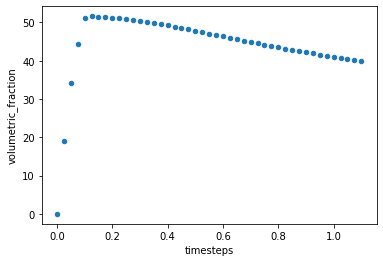

In [13]:
display_html(lv.plot_metric(lv.STATES.EF))

In [14]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.rotation(circ_spks, t_ed=0.1)

array([-29.78308333, -20.3935104 , -11.56646507,  -4.63517564,
         0.        ,  -0.21350426,  -0.30939529,  -0.5043765 ,
        -0.72168004,  -0.94631928,  -1.11895456,  -1.3027141 ,
        -1.51840457,  -1.71574336,  -1.95813824,  -2.20651249,
        -2.42438141,  -2.64106399,  -2.9329321 ,  -3.15109642,
        -3.36941791,  -3.59134051,  -3.81790067,  -4.03216593,
        -4.24647015,  -4.44752907,  -4.65229903,  -4.85140077,
        -5.04888759,  -5.247183  ,  -5.42694426,  -5.60405865,
        -5.77499174,  -5.94064463,  -6.10233306,  -6.25856544,
        -6.41181655,  -6.55704309,  -6.69964826,  -6.78681939,
        -6.91600988,  -7.06073774,  -7.18898109,  -7.31114181,
        -7.42957415])

Twist:

In [15]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.rotation(circ_spks, t_ed=0.1)

array([-29.78308333, -20.3935104 , -11.56646507,  -4.63517564,
         0.        ,  -0.21350426,  -0.30939529,  -0.5043765 ,
        -0.72168004,  -0.94631928,  -1.11895456,  -1.3027141 ,
        -1.51840457,  -1.71574336,  -1.95813824,  -2.20651249,
        -2.42438141,  -2.64106399,  -2.9329321 ,  -3.15109642,
        -3.36941791,  -3.59134051,  -3.81790067,  -4.03216593,
        -4.24647015,  -4.44752907,  -4.65229903,  -4.85140077,
        -5.04888759,  -5.247183  ,  -5.42694426,  -5.60405865,
        -5.77499174,  -5.94064463,  -6.10233306,  -6.25856544,
        -6.41181655,  -6.55704309,  -6.69964826,  -6.78681939,
        -6.91600988,  -7.06073774,  -7.18898109,  -7.31114181,
        -7.42957415])

Twist:

In [16]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1)

array([-1.53830838e-01, -5.68894882e-03,  2.43891670e-02,  1.86436081e-02,
        3.58000018e-02, -6.64394481e-02, -2.10479338e-01, -1.74068128e-01,
       -9.15555411e-02, -7.54509131e-02, -6.42317709e-02, -1.78974396e-02,
       -1.63210021e-01, -1.51579895e-01, -1.09304981e-01, -1.02829120e-01,
       -9.17602051e-02, -4.18060541e-02, -6.86647464e-02, -2.04343969e-02,
        1.13967204e-03, -9.85687286e-02, -4.11630103e-02, -5.70550027e-02,
       -3.37707430e-02, -1.19501917e-02, -2.83215984e-02, -7.92434865e-02,
       -5.32264439e-02, -5.80879874e-02, -2.85768498e-02, -4.46555603e-02,
       -4.64258835e-03, -9.49091040e-02, -7.07397087e-02, -2.17124417e-02,
        1.20285741e-04,  3.11571890e-02,  4.25509195e-02,  3.34736507e-02,
        3.53250603e-02,  1.13918863e-02,  9.03542553e-03,  1.03837541e-03,
        4.56969606e-03])

Torsion:

In [17]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1)

array([-3.58028755e-03, -1.32405653e-04,  5.67638011e-04,  4.33914802e-04,
        8.33215901e-04, -1.54632408e-03, -4.89873526e-03, -4.05129400e-03,
       -2.13088070e-03, -1.75605859e-03, -1.49494219e-03, -4.16548339e-04,
       -3.79858039e-03, -3.52789867e-03, -2.54398447e-03, -2.39326408e-03,
       -2.13564409e-03, -9.73001880e-04, -1.59811608e-03, -4.75593956e-04,
        2.65249391e-05, -2.29410693e-03, -9.58035560e-04, -1.32790875e-03,
       -7.85986555e-04, -2.78130984e-04, -6.59162151e-04, -1.84432765e-03,
       -1.23880216e-03, -1.35195062e-03, -6.65102919e-04, -1.03932182e-03,
       -1.08052465e-04, -2.20893214e-03, -1.64640914e-03, -5.05339407e-04,
        2.79955271e-06,  7.25158214e-04,  9.90338017e-04,  7.79071975e-04,
        8.22162025e-04,  2.65136882e-04,  2.10292175e-04,  2.41673424e-05,
        1.06355956e-04])